In [54]:
import numpy as np
import os
from DDBC import DDBClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

In [55]:
from sklearn.metrics import normalized_mutual_info_score


def load(dataset):
    data = np.loadtxt(os.path.join('datasets', f'{dataset}.txt'))
    X = np.array(data)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    y = np.loadtxt(os.path.join('datasets', f'{dataset}-labels.pa'))
    return X, y


def render(x, y, density, distance):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    if x is not None or y is not None:
        axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='inferno', marker='.')
        axes[0].set_title("Clusters")
        axes[0].set_xlabel("X-axis")
        axes[0].set_ylabel("Y-axis")

    axes[1].scatter(density, distance)
    axes[1].set_title("Distance (density)")
    axes[1].set_xlabel("Density")
    axes[1].set_ylabel("Distance")

    plt.tight_layout()
    plt.show()


def clusterize(dataset, steps_number, do_render):
    X, y = load(dataset)

    best_score = 0
    best_labels = None
    best_density = None
    best_distances = None

    d_c_list = np.linspace(0, np.log(len(X)), steps_number)
    print(len(X))
    for dc in tqdm(enumerate(d_c_list), total=len(d_c_list)):
        clusterizer = DDBClustering(d_c=dc[1], n_clusters=len(set(y)))
        clusterizer.fit(X)
        pred_labels = clusterizer.labels

        score = normalized_mutual_info_score(y, pred_labels)
        if score > best_score:
            best_score = score
            best_labels = pred_labels
            best_density = clusterizer.density
            best_distances = clusterizer.min_distances

    print("Best Normalized Mutual Info Score:", best_score)
    if do_render:
        render(X, best_labels, best_density, best_distances)
    else:
        render(None, None, best_density, best_distances)

3000


100%|██████████| 500/500 [00:35<00:00, 14.02it/s]


Best Normalized Mutual Info Score: 0.8882277172217937


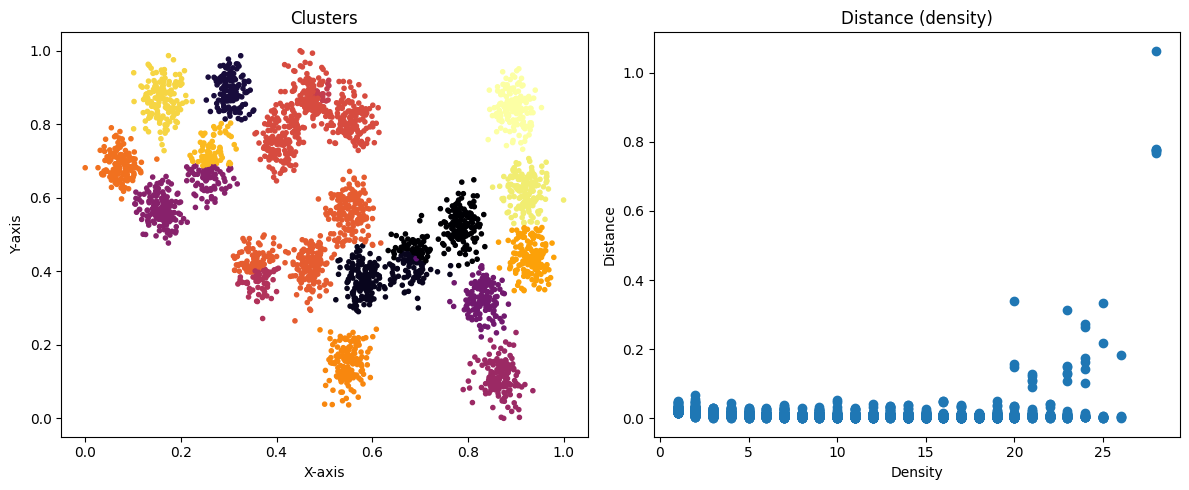

In [63]:
clusterize('a1', 500, True)

5250


100%|██████████| 500/500 [01:28<00:00,  5.67it/s]


Best Normalized Mutual Info Score: 0.9385510099565518


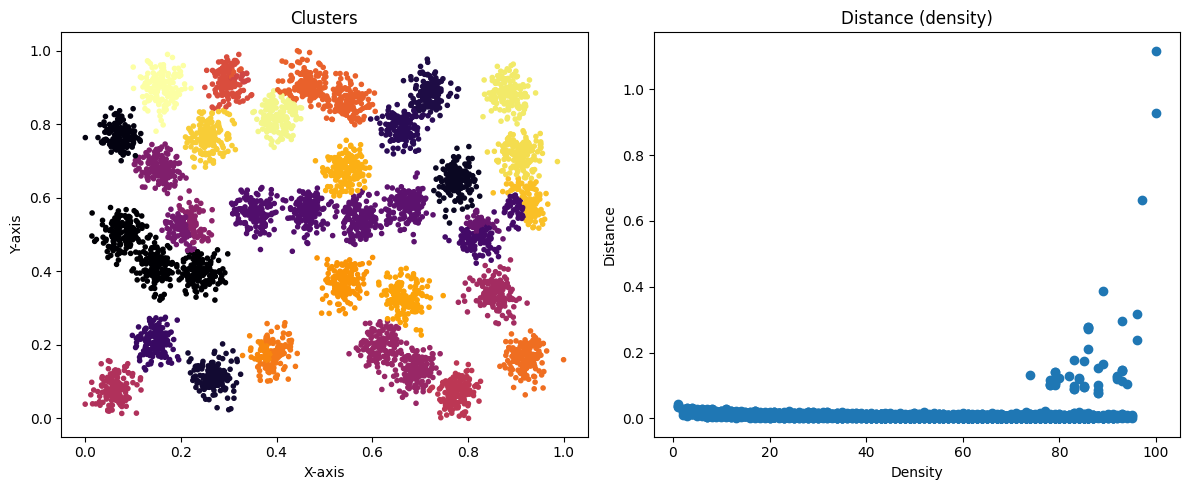

In [64]:
clusterize('a2', 500, True)

5000


100%|██████████| 500/500 [01:19<00:00,  6.33it/s]


Best Normalized Mutual Info Score: 0.9190352787395424


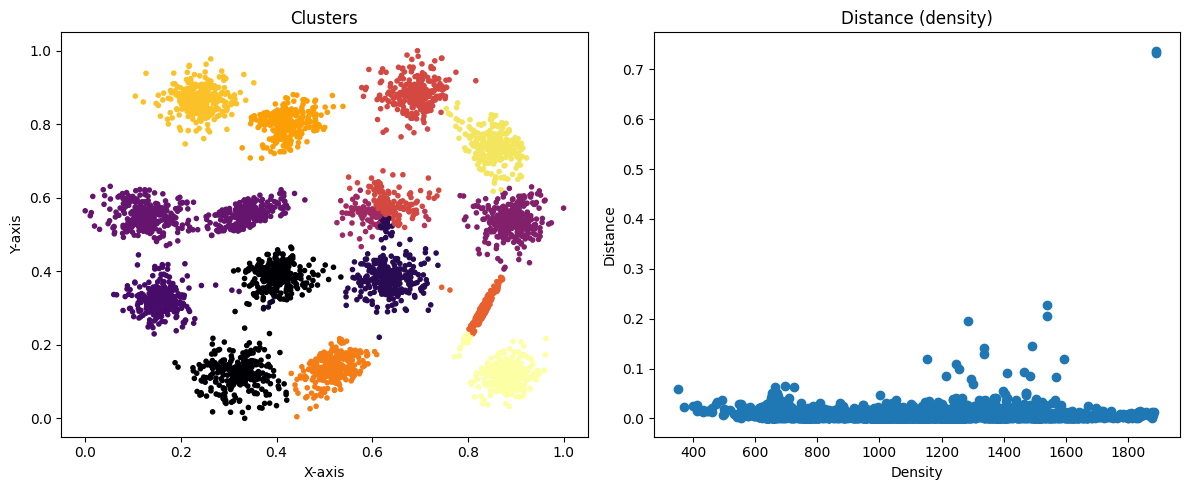

In [66]:
clusterize('s1', 500, True)


5000


100%|██████████| 500/500 [01:16<00:00,  6.51it/s]


Best Normalized Mutual Info Score: 0.6806126223169804


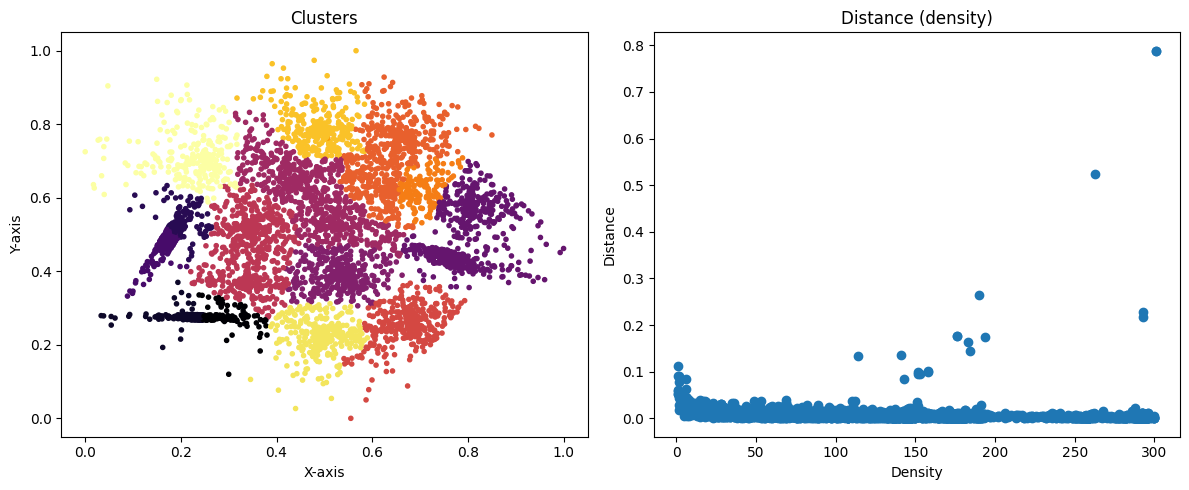

In [65]:
clusterize('s4', 500, True)

1024


100%|██████████| 500/500 [00:21<00:00, 23.22it/s]


Best Normalized Mutual Info Score: 0.9092668381661754


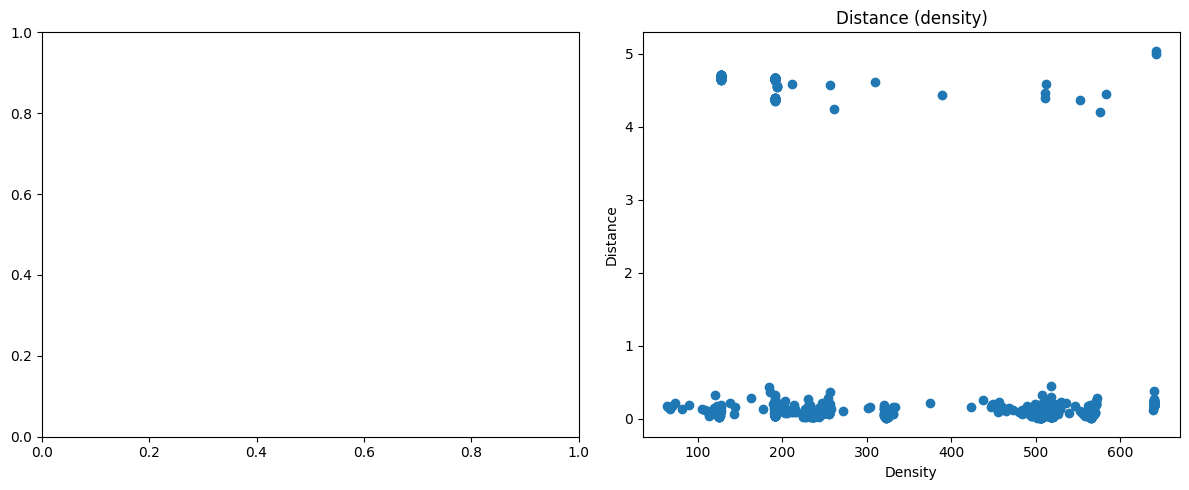

In [61]:
clusterize('dim128', 500, False)

1024


100%|██████████| 500/500 [01:04<00:00,  7.81it/s]


Best Normalized Mutual Info Score: 0.7924351087628037


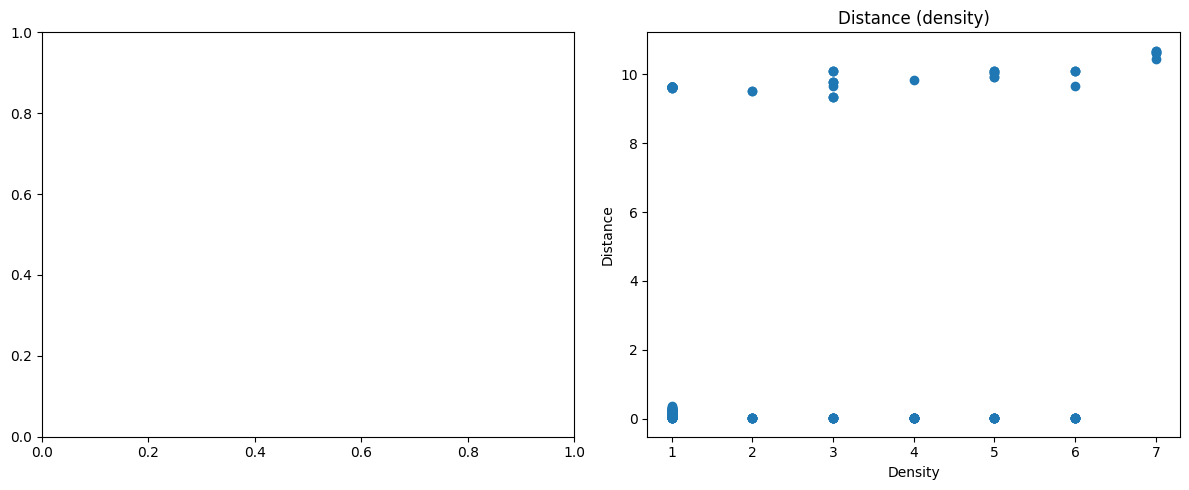

In [62]:
clusterize('dim512', 500, False)

6500


100%|██████████| 500/500 [02:01<00:00,  4.11it/s]


Best Normalized Mutual Info Score: 0.9737863772964424


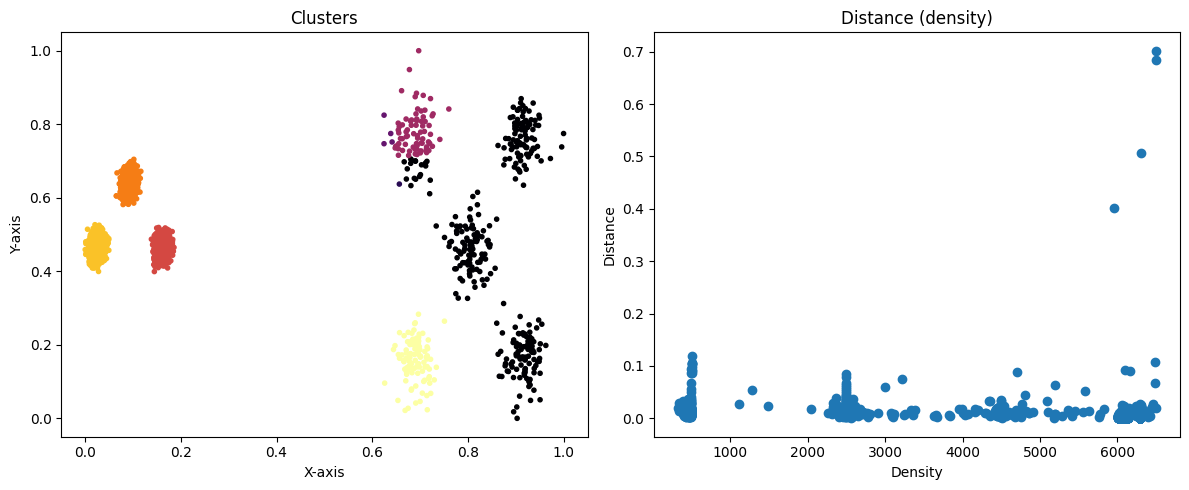

In [60]:
clusterize('unbalance', 500, True)

Судя по 2D случаю, кластеризация работает. Алгоритм размерность-независимый, так что в многомерном случае стоит ожидать такого же результата. Касаемо графиков (плотность-расстояние), видно, что в среднем, данные хорошо подлежат разбиению, однако есть o(N), точек, которые являются выбросами и сильно отдалены от центров всех класетров